In [1]:
import pandas as pd
import numpy as np
import string
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import CountVectorizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure


#For text pre processing
import re, string
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
from gensim import corpora

#Plotting a wordcloud to understand important and frequent terms
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

C:\Users\Aayushi\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
path = 'Cyber Security Breaches.csv'
data = pd.read_csv(path,error_bad_lines=False)

In [3]:
data.columns

Index(['Unnamed: 0', 'Number', 'Name_of_Covered_Entity', 'State',
       'Business_Associate_Involved', 'Individuals_Affected', 'Date_of_Breach',
       'Type_of_Breach', 'Location_of_Breached_Information',
       'Date_Posted_or_Updated', 'Summary', 'breach_start', 'breach_end',
       'year'],
      dtype='object')

In [4]:
data.tail()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
1050,1051,1050,Puerto Rico Health Insurance,PR,American Health Inc,28413,9/20/2013,Theft,Other,2014-06-27,NaN,2013-09-20,NaN,2013
1051,1052,1051,"Hospitalists of Brandon, LLC",FL,"Doctors First Choice Billings, Inc.",1831,2/11/2014,Hacking/IT Incident,Other,2014-06-27,NaN,2014-02-11,NaN,2014
1052,1053,1052,Santa Rosa Memorial Hospital,CA,NaN,33702,6/2/2014,"Theft, Loss",Other Portable Electronic Device,2014-06-27,NaN,2014-06-02,NaN,2014
1053,1054,1053,Group Health Plan of Hurley Medical Center,MI,NaN,2289,5/13/2014,Unauthorized Access/Disclosure,E-mail,2014-06-27,NaN,2014-05-13,NaN,2014
1054,1055,1054,"Abrham Tekola, M.D.,INC",CA,NaN,5471,5/27/2014,Theft,Desktop Computer,2014-06-27,NaN,2014-05-27,NaN,2014


In [5]:
df1 = data.where((pd.notnull(data)), 'NoData')
df1.tail()

,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
1050,1051,1050,Puerto Rico Health Insurance,PR,American Health Inc,28413,9/20/2013,Theft,Other,2014-06-27,NoData,2013-09-20,NoData,2013
1051,1052,1051,"Hospitalists of Brandon, LLC",FL,"Doctors First Choice Billings, Inc.",1831,2/11/2014,Hacking/IT Incident,Other,2014-06-27,NoData,2014-02-11,NoData,2014
1052,1053,1052,Santa Rosa Memorial Hospital,CA,NoData,33702,6/2/2014,"Theft, Loss",Other Portable Electronic Device,2014-06-27,NoData,2014-06-02,NoData,2014
1053,1054,1053,Group Health Plan of Hurley Medical Center,MI,NoData,2289,5/13/2014,Unauthorized Access/Disclosure,E-mail,2014-06-27,NoData,2014-05-13,NoData,2014
1054,1055,1054,"Abrham Tekola, M.D.,INC",CA,NoData,5471,5/27/2014,Theft,Desktop Computer,2014-06-27,NoData,2014-05-27,NoData,2014


In [6]:
#Number of words
df1['word_count'] = df1['Summary'].apply(lambda x: len(str(x).split(" ")))
df1[['Summary','word_count']].tail()

,Summary,word_count
1050,NoData,1
1051,NoData,1
1052,NoData,1
1053,NoData,1
1054,NoData,1


# Word Cloud

In [7]:
def clean_tweet_text(tweet):
    tweet = re.sub(r'\$\w*','',tweet)
    tweet = re.sub(r'https?:\/\/.*\/\w*','',tweet) 
    tweet = re.sub(r'['+string.punctuation+']+', ' ',tweet) 
    tweet = re.sub(r'[0-9]+',r'',tweet)
    return tweet
wl = WordNetLemmatizer()

def penn2morphy(penntag):
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(text): 
   
    # Text input is string, returns lowercased strings.
    text = clean_tweet_text(text)
    tokenized_list = [w for w in word_tokenize(text)]
    
    
    l1=[]
    for i in tokenized_list:
        if i.lower() not in stopwords and len(i)>4:
            l1.append(i)
        else:
            pass
    return [wl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(l1)]

def most_common_words(tweets_texts):
    words = []
    for tw in tweets_texts:
          words.append(lemmatize_sent(tw))
    flatten = [item for sublist in words for item in sublist]
    flatten = ' '.join(flatten)
    flatten
    return flatten




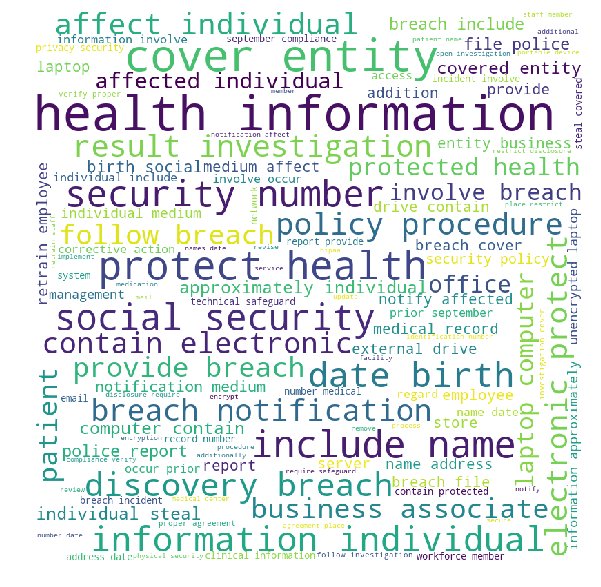

In [8]:
#Plotting the word cloud

text_list = df1['Summary'].tolist()
tweets_texts = list(filter(lambda a: a != 'NoData', text_list))

comment_words = most_common_words(tweets_texts)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

# Cleaning and feature definition

In [9]:
tweets_sample_text = df1['Summary']

In [10]:
# Preprocessing step

# try with sample from one user first

# most tweets have http url inside, so i'll try to remove it first
import re

# remove http url,
# using regex from cheatsheet
# http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+
# taken from http://urlregex.com
tweets_sample_text = tweets_sample_text.apply(lambda my_str: re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+","",my_str).strip())

#using nltk to build a word count
from nltk.tokenize import word_tokenize
word_tokenize(tweets_sample_text[0])
#tweets_sample_text.apply()

['A',
 'binder',
 'containing',
 'the',
 'protected',
 'health',
 'information',
 '(',
 'PHI',
 ')',
 'of',
 'up',
 'to',
 '1,272',
 'individuals',
 'was',
 'stolen',
 'from',
 'a',
 'staff',
 'member',
 "'s",
 'vehicle',
 '.',
 'The',
 'PHI',
 'included',
 'names',
 ',',
 'telephone',
 'numbers',
 ',',
 'detailed',
 'treatment',
 'notes',
 ',',
 'and',
 'possibly',
 'social',
 'security',
 'numbers',
 '.',
 'In',
 'response',
 'to',
 'the',
 'breach',
 ',',
 'the',
 'covered',
 'entity',
 '(',
 'CE',
 ')',
 'sanctioned',
 'the',
 'workforce',
 'member',
 'and',
 'developed',
 'a',
 'new',
 'policy',
 'requiring',
 'on-call',
 'staff',
 'members',
 'to',
 'submit',
 'any',
 'information',
 'created',
 'during',
 'their',
 'shifts',
 'to',
 'the',
 'main',
 'office',
 'instead',
 'of',
 'adding',
 'it',
 'to',
 'the',
 'binder',
 '.',
 'Following',
 'OCR',
 "'s",
 'investigation',
 ',',
 'the',
 'CE',
 'notified',
 'the',
 'local',
 'media',
 'about',
 'the',
 'breach',
 '.']

In [11]:
from nltk.corpus import stopwords

# use english stop_words
stop_words =  list(stopwords.words('english'))

# find new, study, may, and rt in the top words, but there are keywords that not really related to health,
# we can add it on our stopwords list
stop_words.extend(["breach","NoData"])

# make a function to split words and choose only alphabetic and words that are not in stop words list
def alphabetic_only(x_string):
    tokens = word_tokenize(x_string.lower())
    # remove all tokens that are not alphabetic
    words = [word for word in tokens if word.isalpha() and word not in stop_words and len(word)>4]
    return words

tweets_sample_text_clean = tweets_sample_text.apply(lambda my_str: alphabetic_only(my_str))

stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
# using gensim to count the term/word frequency
from gensim import corpora
# dictionary of the words from tweet_sample_text_clean
dictionary = corpora.Dictionary(tweets_sample_text_clean)
corpus = [dictionary.doc2bow(text) for text in tweets_sample_text_clean]


In [13]:
vocab = list(dictionary.values()) # list of terms/vocabulary in the dictionary
# create a list of term dictionary matrix back from corpus
vocab_tf = [dict(i) for i in corpus]
# count the frequency using pd.DataFrame, can also build manually using dictionary
vocab_tf = list(pd.DataFrame(vocab_tf).sum(axis=0)) #list of term frequencies
vocab_tf = np.array(vocab_tf)/np.sum(vocab_tf) # count the probability

In [14]:
vocab_tf = list(zip(range(len(vocab_tf)),vocab_tf))

In [15]:
vocab_tf_sorted = sorted(vocab_tf,key=lambda x:x[1],reverse=True)
vocab_tf_sorted = [(dictionary.id2token[x[0]],x[1]) for x in vocab_tf_sorted[0:10]]

In [16]:
vocab_tf_sorted

[('nodata', 0.089659235981537855),
 ('information', 0.024354316016890896),
 ('individuals', 0.021899243837768829),
 ('health', 0.018069331238338406),
 ('security', 0.017578316802513993),
 ('entity', 0.016007070607875873),
 ('numbers', 0.015712461946381224),
 ('covered', 0.015516056172051458),
 ('protected', 0.014534027300402631),
 ('names', 0.012373563782775213)]

# Top 10 words

In [17]:
# make a function to split words and choose only alphabetic and words that are not in stop words list
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))



# The example works, now making function for any dataset input
def vocab_tf_sort(tweets_sample_text,stop_words=stopwords.words('english'),N=10):
   
    # Preprocessing step
    
    # remove http url,
    # using regex from cheatsheet
    # http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+
    # taken from http://urlregex.com
    tweets_sample_text = tweets_sample_text.apply(lambda my_str: re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+","",my_str).strip())

    #using nltk to build a word count
    tweets_sample_text_clean = tweets_sample_text.apply(lambda my_str: alphabetic_only(my_str))
    
    # using gensim to count the term/word frequency
    # dictionary of the words from tweet_sample_text_clean
    dictionary = corpora.Dictionary(tweets_sample_text_clean)
    corpus = [dictionary.doc2bow(text) for text in tweets_sample_text_clean]
    
    vocab = list(dictionary.values()) # list of terms/vocabulary in the dictionary
    # create a list of term dictionary matrix back from corpus
    vocab_tf = [dict(i) for i in corpus]
    # count the frequency using pd.DataFrame, can also build manually using dictionary
    vocab_tf = list(pd.DataFrame(vocab_tf).sum(axis=0)) #list of term frequencies
    vocab_tf = np.array(vocab_tf)/np.sum(vocab_tf) # count the probability
    
    vocab_tf = list(zip(range(len(vocab_tf)),vocab_tf))
    
    vocab_tf_sorted = sorted(vocab_tf,key=lambda x:x[1],reverse=True)
    vocab_tf_sorted = [(dictionary.id2token[x[0]],x[1]) for x in vocab_tf_sorted[0:N]]
    
    return vocab_tf_sorted

In [18]:
frequency = vocab_tf_sort(df1['Summary'])

Text(0,0.5,'frequency')

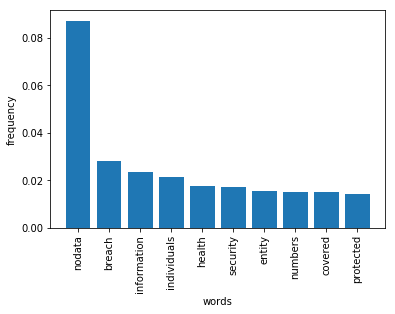

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.bar(range(0,len(frequency)),list(map(lambda x:x[1],frequency)),tick_label=list(map(lambda x:x[0],frequency)),align="center")
plt.xticks(rotation='vertical')
plt.xlabel("words")
plt.ylabel("frequency")
# find new, study, may, and rt in the top words, but there are keywords that not really related to health,
# we can add it on our stopwords list

# Clustering

# Using tf-idf vector

In [20]:
tweets_pd = pd.DataFrame()
tweets_pd = df1[['Summary']]
type(tweets_pd)
# clustering

# tf per documents vector with words as features
tweets_sample_text = tweets_pd.Summary.apply(lambda my_str: re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+","",my_str).strip())

#using nltk to build a word count
tweets_sample_text_clean = tweets_sample_text.apply(lambda my_str: alphabetic_only(my_str))

# using gensim to count the term/word frequency
# dictionary of the words from tweet_sample_text_clean
dictionary = corpora.Dictionary(tweets_sample_text_clean)
corpus = [dictionary.doc2bow(text) for text in tweets_sample_text_clean]

In [21]:
tweets_sample_text_clean

0       [binder, containing, protected, health, inform...
1       [desktop, computers, containing, unencrypted, ...
2                                                [nodata]
3       [laptop, employee, transit, public, transporta...
4       [shared, computer, backup, stolen, reception, ...
5       [shared, computer, backup, stolen, reception, ...
6       [shared, computer, backup, stolen, reception, ...
7       [shared, computer, backup, stolen, computer, c...
8       [shared, computer, backup, stolen, reception, ...
9       [laptop, computer, stolen, workforce, member, ...
10                                               [nodata]
11      [laptop, stolen, locked, office, aurora, lukes...
12      [breach, report, course, investigation, covere...
13                                               [nodata]
14                                               [nodata]
15                                               [nodata]
16      [desktop, laptop, computers, stolen, covered, ...
17            

In [22]:
import numpy as np
# convert corpus to sparse matrix
from gensim import matutils
features_mat = matutils.corpus2csc(corpus)

In [23]:
# Use TFIDF vector for transforming word / document frequency
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
transformer = TfidfTransformer()
tfidf_mat = transformer.fit_transform(features_mat.transpose())

In [24]:
# KMeans clustering produced using sklearn package
from sklearn.cluster import KMeans
num_of_clusters = 16
km_model_01 = KMeans(num_of_clusters)

In [25]:
# tfidf matrix is used for training the kmeans model
km_model_01.fit(tfidf_mat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
km_output_01 = km_model_01.transform(tfidf_mat)

In [27]:
# look at the clusters distribution
# one cluster having more documents than others
x = pd.DataFrame(km_model_01.labels_,columns=["CLUSTER"])
x["count"] = 1
x.groupby(["CLUSTER"]).sum()
#?x.groupby

,count
CLUSTER,
0,913
1,16
2,5
3,5
4,6
5,3
6,13
7,20
8,5


In [28]:
tweets_pd_01 = tweets_pd.copy()
tweets_pd_01["CLUSTER"] = km_model_01.labels_

In [29]:
# check the correlation between the cluster and users
#pd.DataFrame(tweets_pd.loc[:,"CLUSTER"]).corrwith(pd.DataFrame(tweets_pd.loc[:,"FILE"]))
def show_distribution(tweets_pd,prob=True,sort_cluster=True):
    tweets_group_pd = tweets_pd.groupby(["FILE","CLUSTER"],as_index=False).count()
    test = {}
    for index,tweets_file in enumerate(os.listdir("Health-Tweets/")):
        test[tweets_file] = {}
        temp_pd = tweets_group_pd[tweets_group_pd.FILE==tweets_file]
        uhu = []
        total = temp_pd.sum().ID        
        for i in range(temp_pd.shape[0]):
            if sort_cluster == False:
                test[tweets_file][temp_pd.iloc[i,:].CLUSTER] = temp_pd.iloc[i,:].ID
            else:
                if prob:
                    uhu.append({"cluster":i,"freq":temp_pd.iloc[i,:].ID/total})
                else:
                    uhu.append({"cluster":i,"freq":temp_pd.iloc[i,:].ID})
        if sort_cluster:
            test[tweets_file] = dict(zip(range(16),sorted(uhu,key=lambda x: x["freq"],reverse=True)))    
    test_frame = pd.DataFrame(test)
    return test_frame

In [30]:
km_model_01.cluster_centers_.shape

(16, 1321)

In [31]:
def show_top_words(km_model,dictionary,top_n=10):
    # look at the tweets based on cluster
    order_centroids = km_model.cluster_centers_.argsort()[:, ::-1] 
    for i in range(num_of_clusters):  
        #np.argsort(km_model_out[:,i])[::-top_n]
        # look at the top 5 closest tweets from the centroids
        print("Cluster {}: ".format(i))
        for index in order_centroids[i, :top_n]: 
        #for index in np.argsort(km_model_out[tweets_pd[tweets_pd.CLUSTER==i].index,i])[::-1][:5]:
            print(dictionary.get(index))
        print()

In [32]:
show_top_words(km_model_01,dictionary)

Cluster 0: 
nodata
migrated
implement
worked
agency
comprehensive
conditions
corrected
corrupted
fixed

Cluster 1: 
security
breach
individuals
provided
procedures
policies
stolen
information
investigation
media

Cluster 2: 
added
computer
safeguards
secure
retraining
requiring
rules
drive
staff
information

Cluster 3: 
email
business
associate
covered
entity
benefits
recipients
steps
requirements
mailing

Cluster 4: 
external
drives
security
breach
employee
unencrypted
medical
notification
dates
numbers

Cluster 5: 
laptop
theft
shands
company
information
office
stolen
numbers
drives
storage

Cluster 6: 
breach
individuals
information
agreement
health
investigation
restricted
provided
prior
names

Cluster 7: 
laptop
information
entity
breach
covered
health
protected
computer
security
individuals

Cluster 8: 
portable
breach
device
media
security
individuals
information
policy
physical
conducted

Cluster 9: 
information
individuals
breach
affected
records
security
investigation
demogra

In [33]:
def show_top_tweets(km_model_out,tweets_pd,top_n=10):
    # look at the tweets based on cluster
    #order_centroids = km_model.cluster_centers_.argsort()[:, ::-1] 
    for i in range(num_of_clusters):  
        #np.argsort(km_model_out[:,i])[::-top_n]
        # look at the top 5 closest tweets from the centroids
        print("Cluster {}: ".format(i))
        #for index in order_centroids[i, :top_n]: 
        print(tweets_pd[tweets_pd.CLUSTER==i][0:10])
        """
        for index in np.argsort(km_model_out[tweets_pd[tweets_pd.CLUSTER==i].index,i])[::-1][:5]:
            #print(tweets_pd.iloc[index,:].TEXT)
            print(tweets_sample_text_clean.iloc[index])
        """
    print()

In [34]:
np.argsort(km_output_01[:,0])[::-1]

array([294, 592,  16, ..., 695, 694, 527], dtype=int64)

In [35]:
# look at the tweets based on cluster centroids
show_top_tweets(km_output_01,tweets_pd_01,10)

Cluster 0: 
   Summary  CLUSTER
2   NoData        0
10  NoData        0
13  NoData        0
14  NoData        0
15  NoData        0
17  NoData        0
19  NoData        0
22  NoData        0
25  NoData        0
26  NoData        0
Cluster 1: 
                                               Summary  CLUSTER
36   The covered entity's (CE) business associate (...        1
37   The covered entity's (CE) business associate (...        1
48   An unencrypted laptop computer containing the ...        1
193  An encrypted laptop computer that contained th...        1
297  An employee of the covered entity (CE), VA Car...        1
322  Two unencrypted laptop computers containing th...        1
427  OCR opened an investigation of the covered ent...        1
461  An unencrypted laptop computer and external ha...        1
467  An unencrypted laptop computer and external ha...        1
468  The covered entity (CE) filed a breach report ...        1
Cluster 2: 
                                        